In [1]:
genome_path = "/Users/7408588/Documents/School.nosync/phd_stuff/"

In [2]:
import numpy as np
import pandas as pd
import json
uncurated_path = genome_path + '178genomes/'
with open(uncurated_path + 'ncbi_dataset/data/linking_dict.json') as file:
    uncurated_filenames = np.asarray(list(json.load(file).values()))

curated_genome_frame = pd.read_csv(genome_path + '58genomes/ncbi_dataset/data/curated_genome_frame.csv')
curated_filenames =  curated_genome_frame['Filename'].to_numpy()

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
# splits the filenames into subspecies and returns assembly counts for each subspecies
def parse_filenames_to_species(genome_names):
    subspecies = np.zeros(genome_names.shape).astype(str)
    grab_species = np.vectorize(lambda x: x.split('_')[1] if (x.split('_')[1] != 'sp' and x.split('_')[1] != 'subsp') else 'no subspecies')
    species_distr, counts = np.unique(grab_species(genome_names), return_counts=True)
    counts = np.append(counts, [1, 1])
    
    return species_distr, counts

uncurated_species, uncurated_counts = parse_filenames_to_species(uncurated_filenames)
curated_species, curated_counts = parse_filenames_to_species(curated_filenames)
mask = ~np.isin(uncurated_species, curated_species)
curated_species, curated_counts = (np.hstack((curated_species, uncurated_species[mask])), 
                                   np.hstack((curated_counts, 
                                              np.zeros(shape=uncurated_species.shape[0] - 
                                                             curated_species.shape[0]))))

sort_idx = np.argsort(curated_species)
curated_species = curated_species[sort_idx]
curated_counts = curated_counts[sort_idx]

sort_idx = np.argsort(uncurated_species)
uncurated_species = uncurated_species[sort_idx]
uncurated_counts = uncurated_counts[sort_idx]

def get_random_colors(n):
      colors = np.array(list(mpl.colors.CSS4_COLORS.values()))
      return np.random.choice(colors,size=n,replace=False)

    

/var/folders/mn/t0hb8mrx44vdz_nmtvs51hkrkq821d/T/ipykernel_40187/162163159.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(uncurated_species, rotation = 45)
/var/folders/mn/t0hb8mrx44vdz_nmtvs51hkrkq821d/T/ipykernel_40187/162163159.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(curated_species, rotation = 45)


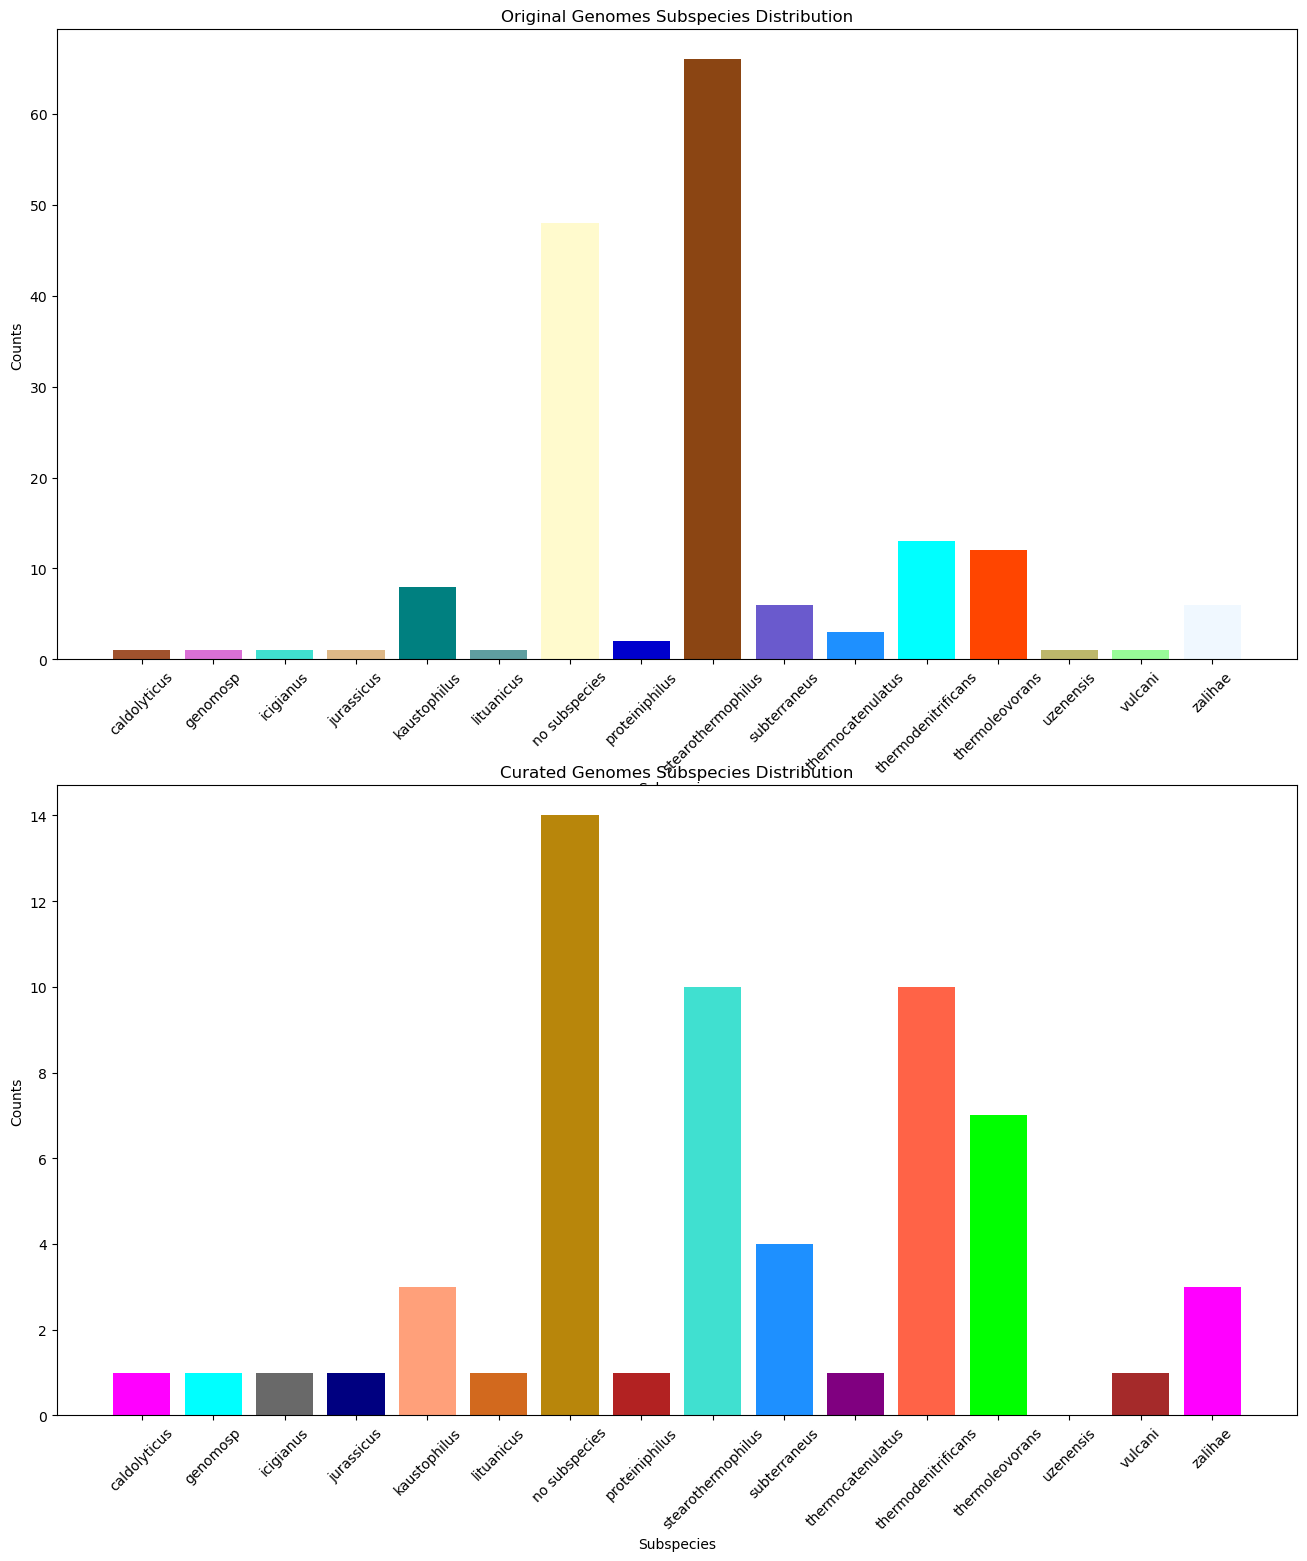

In [4]:
fig, ax = plt.subplots(2,1, figsize=(len(uncurated_species), 18))

def get_random_colors(n):
      colors = np.array(list(mpl.colors.CSS4_COLORS.values()))
      return np.random.choice(colors,size=n,replace=False)

ax[0].bar(uncurated_species, uncurated_counts, color=get_random_colors(uncurated_species.shape[0]))
ax[0].set_title('Original Genomes Subspecies Distribution')
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Subspecies')
ax[0].set_xticklabels(uncurated_species, rotation = 45)


ax[1].bar(curated_species, curated_counts, color=get_random_colors(curated_species.shape[0]))
ax[1].set_title('Curated Genomes Subspecies Distribution')
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('Subspecies')
ax[1].set_xticklabels(curated_species, rotation = 45)

plt.show()


/var/folders/mn/t0hb8mrx44vdz_nmtvs51hkrkq821d/T/ipykernel_40187/1899149075.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(uncurated_species, rotation = 45)


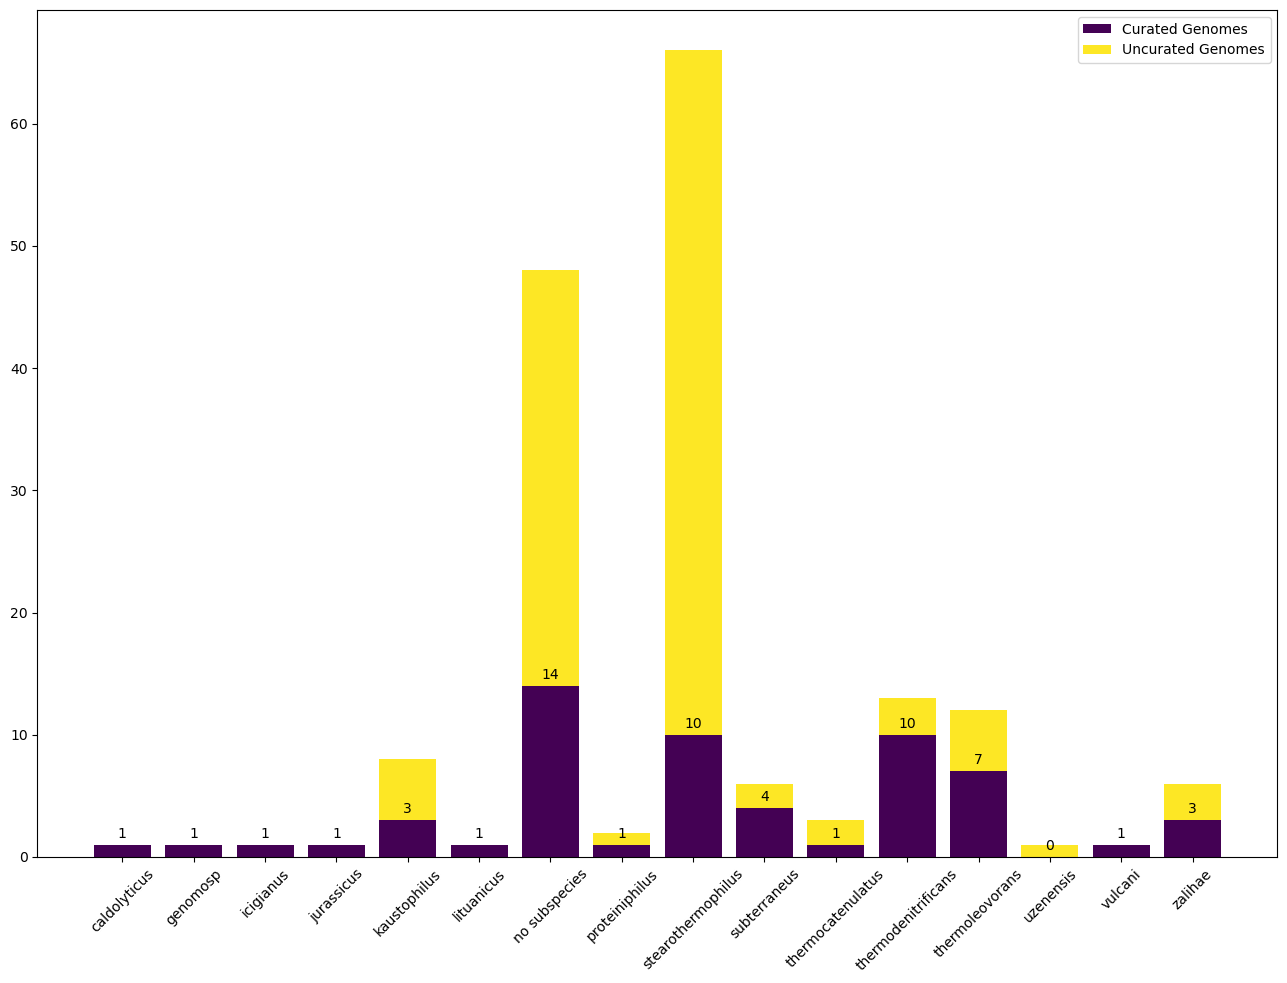

In [5]:
fig, ax = plt.subplots(figsize=(len(uncurated_species), 11))

bottom=np.zeros(uncurated_species.shape[0])
p = ax.bar(curated_species, curated_counts, bottom=bottom, color='#440154FF')
ax.bar_label(p, padding=3)
bottom += curated_counts
p = ax.bar(uncurated_species, uncurated_counts-curated_counts, bottom=bottom, color='#FDE725FF')
ax.set_xticklabels(uncurated_species, rotation = 45)
ax.legend(['Curated Genomes', 'Uncurated Genomes'])
plt.show()
fig.savefig(genome_path + 'genome_distribution.png', dpi=600)

In [6]:
width = 0.8 # the width of the bars
x = 3 * width * np.arange(len(uncurated_species))# the label locations
print(x)
multiplier = 0
mpl.rc('text', usetex = True)
ital_uncurated_species = np.array(['$\it{' + x + '}}$' for x in uncurated_species])

plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(layout='constrained')
rects = ax.barh(x, curated_counts, width, label='Curated Genomes', color='#440154FF')
ax.bar_label(rects, padding=3, fontsize=8*width)
rects = ax.barh(x + width, uncurated_counts, width, label='Uncurated Genomes', color='#FDE725FF')
ax.bar_label(rects, padding=3, fontsize=8*width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('# of Assemblies')
ax.set_yticks(x+width/2, ital_uncurated_species, rotation=0)
ax.legend()

plt.show()
fig.savefig(genome_path + 'genome_distribution_sidebyside.png', dpi=600)

[ 0.   2.4  4.8  7.2  9.6 12.  14.4 16.8 19.2 21.6 24.  26.4 28.8 31.2
 33.6 36. ]


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

In [10]:
df = pd.DataFrame(np.asarray([uncurated_species, uncurated_counts, curated_counts]).T, 
                  columns=['Genomes', 'Original Counts', 'Post Curation Counts'])
df.to_csv('genomes_post_curation.csv')

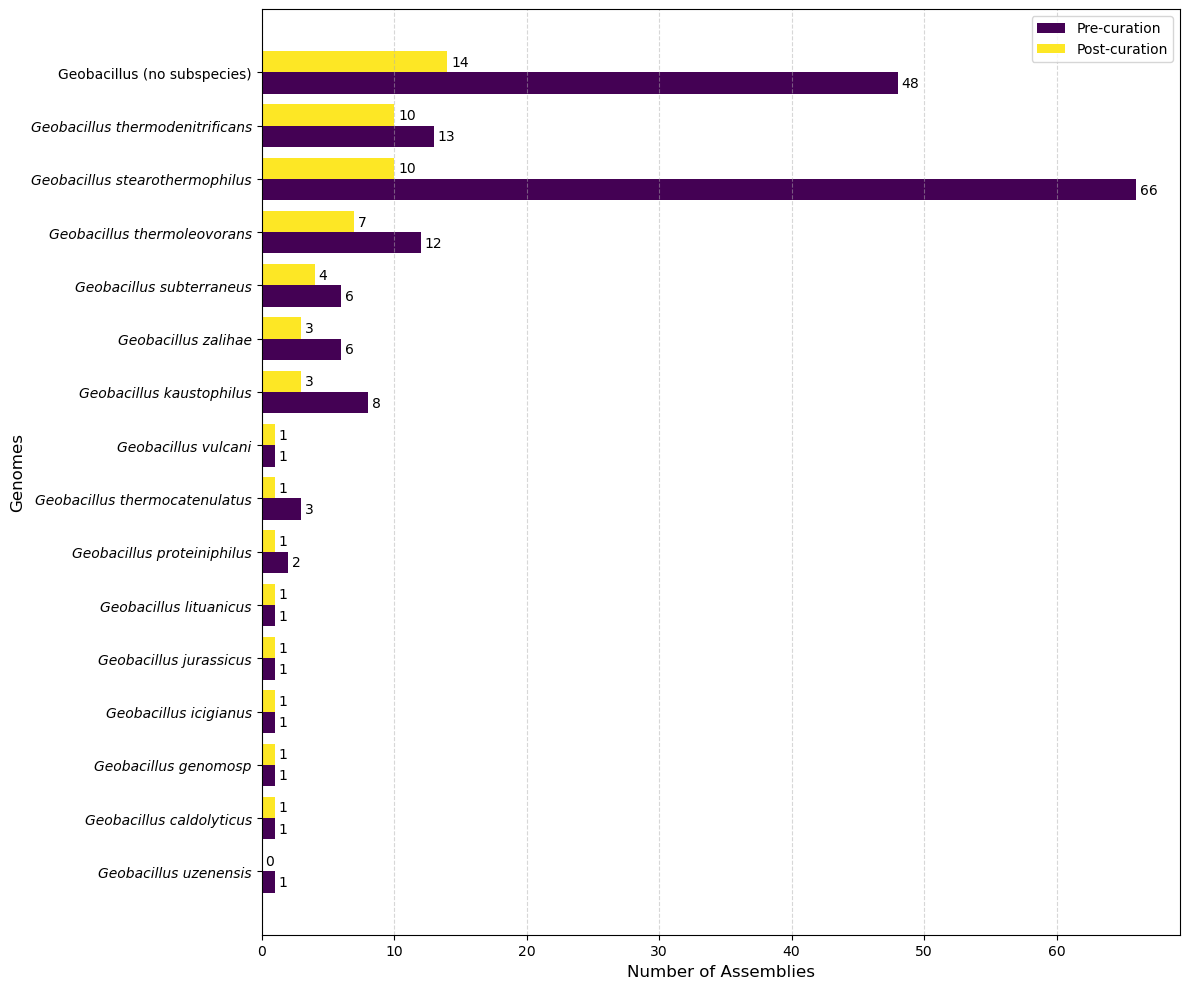

In [24]:

# Load the dataset
file_path = "genomes_post_curation.csv"
df = pd.read_csv(file_path)
mpl.rc('text', usetex = False)
# Function to ensure proper spacing and italics
def format_genome_label(name):
    # Normalize spaces to ensure a single space after "Geobacillus"
    name = " ".join(name.split())
    
    # Handle "(no subspecies)" separately
    if "no subspecies" in name:
        return 'Geobacillus (' + name + ')' # Keep it as is, no italics
    else:
        return "Geobacillus " + name  # Italics will be applied using matplotlib directly

# Apply formatting
df["Formatted Genomes"] = df["Genomes"].apply(format_genome_label)

# Sort dataframe for better visualization
df_sorted = df.sort_values(by='Post Curation Counts', ascending=True)
indices = np.arange(len(df_sorted))
bar_width = 0.4

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Bar plots
pre_bars = ax.barh(indices - bar_width/2, df_sorted["Original Counts"], 
                   height=bar_width, label='Pre-curation', color='#440154FF')
post_bars = ax.barh(indices + bar_width/2, df_sorted["Post Curation Counts"], 
                    height=bar_width, label='Post-curation', color='#FDE725FF')

# Add data labels
for bar in pre_bars:
    width = bar.get_width()
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center', ha='left', fontsize=10)

for bar in post_bars:
    width = bar.get_width()
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
            str(int(width)), va='center', ha='left', fontsize=10)

# Set Y-axis labels with correct spacing
ax.set_yticks(indices)
ax.set_yticklabels(df_sorted["Formatted Genomes"], fontsize=10, fontstyle="italic")

# Special case: Keep "(no subspecies)" in normal font
for i, label in enumerate(ax.get_yticklabels()):
    if "(no subspecies)" in df_sorted.iloc[i]["Formatted Genomes"]:
        label.set_fontstyle("normal")

# Set axis labels and title
ax.set_xlabel("Number of Assemblies", fontsize=12)
ax.set_ylabel("Genomes", fontsize=12)
#ax.set_title("Genomes vs Number of Assemblies (Pre- and Post-curation)", fontsize=14)
ax.legend()

# Styling
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Save as jpg with high resolution
output_path = "genome_assemblies_sidebyside.jpg"
plt.savefig(genome_path + output_path, dpi=720, bbox_inches='tight')

plt.show()